In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reloads custom packages after changes are made
%load_ext autoreload
%autoreload 2

In [3]:
from crystalgrowth_class import crystalgrowth

In [4]:
cg = crystalgrowth(random_seed=10)

In [115]:
nuc_array = np.empty((128,128))
nuc_array[:] = np.nan
nuc_array, pos, orients = cg.nucleate(nuc_array,300)

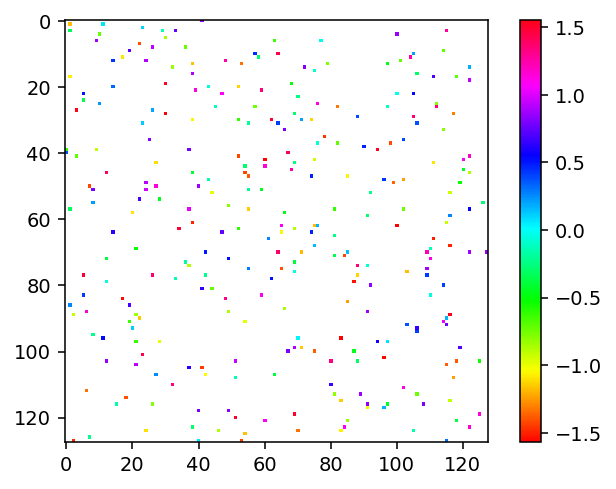

In [116]:
plt.figure(dpi=140)
plt.imshow(nuc_array,cmap='hsv')
plt.colorbar()

In [119]:
grow_array = cg.grow_complete(nuc_array,growth_anisotropy=2,pi_mutate=np.deg2rad(5),c_mutate=np.deg2rad(5))

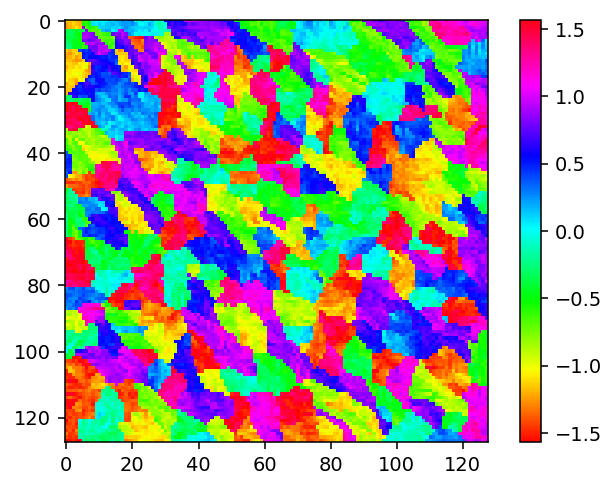

In [120]:
plt.figure(dpi=140)
plt.imshow(grow_array,cmap='hsv',interpolation='none')
plt.colorbar()

In [51]:
from translator_class import translator

In [52]:
tl = translator()

In [53]:
import glob
flist = glob.glob('*.npy')

In [55]:
ss, q, chi, data = tl.load_npy(flist[0])

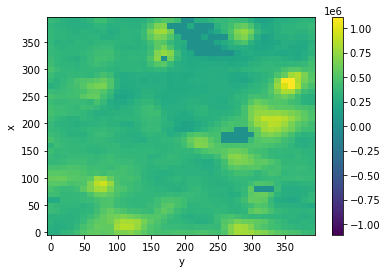

In [68]:
data_sub = tl.subtract_powerlaw(q,data)
data_dark = tl.dark_field(ss,data_sub)
data_dark.plot(cmap='viridis')

In [69]:
peaks, num_peaks, data_1d = tl.peak_finder(q, chi, data_sub)

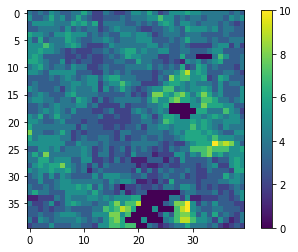

In [72]:
tl.implot(num_peaks)
plt.colorbar()
plt.show()

In [78]:
opt_params = tl.fit_peaks(chi,data_1d,peaks,num_peaks)

In [91]:
peak_int, peak_pos, peak_fwhm, bckgrnd = tl.list_to_array(opt_params,num_peaks)

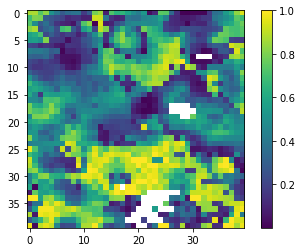

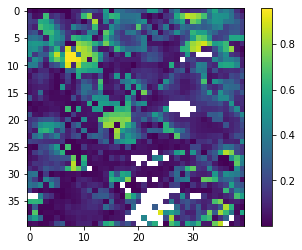

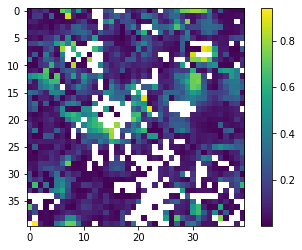

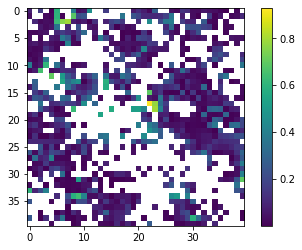

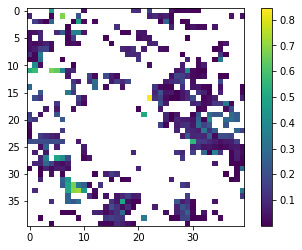

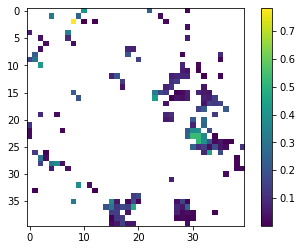

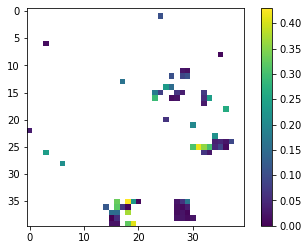

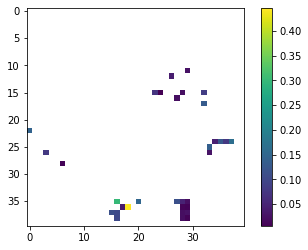

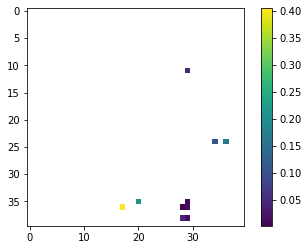

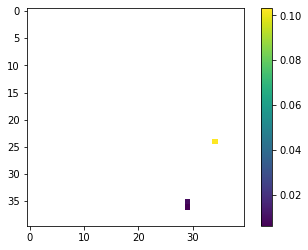

In [101]:
for i in range(peak_pos.shape[-1]):
    plt.figure()
    tl.implot(peak_int[:,i]/np.nansum(peak_int,axis=1),cmap='viridis')
    plt.colorbar()
    plt.show()

In [122]:
from fibergrowth_class import fibergrowth

In [123]:
fg = fibergrowth()

In [186]:
fiberspace, alignmentspace = fg.grow_fibers(100,0,0.1,0.1,5,5,500)

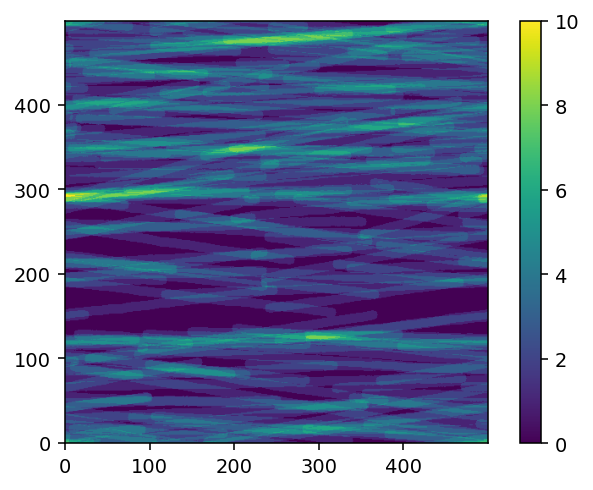

In [187]:
plt.figure(dpi=140)
plt.imshow(fiberspace,origin='lower')
plt.colorbar()
plt.show()

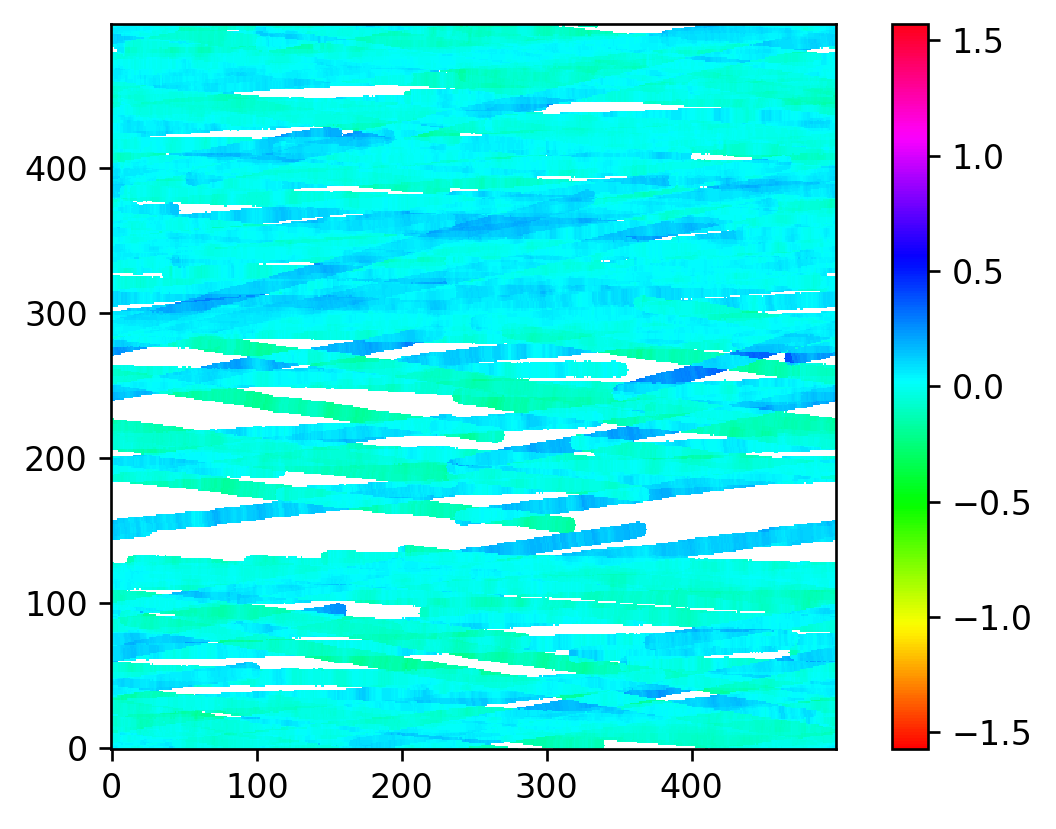

In [188]:
plt.figure(dpi=240)
plt.imshow(alignmentspace,cmap='hsv',vmin=-np.pi/2,vmax=np.pi/2,origin='lower',interpolation='none')
plt.colorbar()
# plt.xlim(0,200)
# plt.ylim(300)
plt.show()

(array([31446., 55643., 67001., 47460., 29181., 12401.,  4116.,  1421.,
         1241.,    90.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

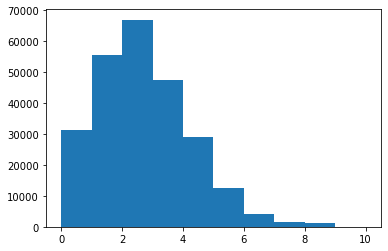

In [189]:
plt.hist(fiberspace.ravel())